<a href="https://colab.research.google.com/github/ehdtkd6629/python/blob/main/py_B_ipynb_5_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기상청_지상 시간자료 시각화



In [1]:
# Python3 샘플 코드 #디코딩 키 사용 (서비스키)


import requests

url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'
para ={'serviceKey' : '00HP68foCda0or18ioQQ+8spPbbgGOogYnz7dgG0/Oq+P0BqCqrIDdfZchAkys4dYXOYRHCAuHtkkm+QQQfO8g==', 'pageNo' : '1', 'numOfRows' : '990', 'dataType' : 'JSON', 'dataCd' : 'ASOS', 'dateCd' : 'HR', 'startDt' : '20100101', 'startHh' : '01', 'endDt' : '20100601', 'endHh' : '01', 'stnIds' : '108' }

res = requests.get(url, params=para)
print(res.content)

b'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"tm":"2010-01-01 01:00","rnum":"1","stnId":"108","stnNm":"\xec\x84\x9c\xec\x9a\xb8","ta":"-11.0","taQcflg":"0","rn":"","rnQcflg":"","ws":"1.2","wsQcflg":"0","wd":"290","wdQcflg":"0","hm":"45","hmQcflg":"0","pv":"1.2","td":"-20.6","pa":"1012.5","paQcflg":"0","ps":"1023.8","psQcflg":"0","ss":"","ssQcflg":"9","icsr":"","dsnw":"2.2","hr3Fhsc":"","dc10Tca":"","dc10LmcsCa":"","clfmAbbrCd":"","lcsCh":"","vs":"","gndSttCd":"","dmstMtphNo":"","ts":"-6.5","tsQcflg":"0","m005Te":"-4.7","m01Te":"-2.1","m02Te":"-0.6","m03Te":"0.6"},{"tm":"2010-01-01 02:00","rnum":"2","stnId":"108","stnNm":"\xec\x84\x9c\xec\x9a\xb8","ta":"-11.1","taQcflg":"0","rn":"","rnQcflg":"","ws":"1.7","wsQcflg":"0","wd":"20","wdQcflg":"0","hm":"46","hmQcflg":"0","pv":"1.2","td":"-20.4","pa":"1012.5","paQcflg":"0","ps":"1023.8","psQcflg":"0","ss":"","ssQcflg":"9","icsr":"","dsnw":"2.2","hr3Fhsc":"","dc10Tca":"","

In [2]:
import json
json_file = json.loads(res.text)

In [3]:
import pandas as pd
from pandas import json_normalize

df = json_normalize(json_file['response']['body']['items']['item'])
df 

,tm,rnum,stnId,stnNm,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,...,lcsCh,vs,gndSttCd,dmstMtphNo,ts,tsQcflg,m005Te,m01Te,m02Te,m03Te
0,2010-01-01 01:00,1,108,서울,-11.0,0,,,1.2,0,...,,,,,-6.5,0,-4.7,-2.1,-0.6,0.6
1,2010-01-01 02:00,2,108,서울,-11.1,0,,,1.7,0,...,,,,,-6.5,0,-4.8,-2.1,-0.6,0.6
2,2010-01-01 03:00,3,108,서울,-12.1,0,,,1.6,0,...,,2000,16,,-6.7,0,-4.9,-2.2,-0.7,0.6
3,2010-01-01 04:00,4,108,서울,-12.3,0,,,1.4,0,...,,2000,,,-6.8,0,-5.0,-2.3,-0.7,0.6
4,2010-01-01 05:00,5,108,서울,-12.4,0,,,1.6,0,...,,2000,,,-7.0,0,-5.1,-2.4,-0.8,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2010-02-11 02:00,986,108,서울,3.5,0,,,5.0,0,...,,,,,1.0,0,0.4,0.1,0.0,0.1
986,2010-02-11 03:00,987,108,서울,3.3,0,,,4.0,0,...,10,2500,1,,0.9,0,0.5,0.1,0.1,0.1
987,2010-02-11 04:00,988,108,서울,3.1,0,,,4.7,0,...,10,2500,,,0.8,0,0.4,0.1,0.0,0.1
988,2010-02-11 05:00,989,108,서울,2.2,0,,9,4.4,0,...,10,1500,,01,0.5,0,0.4,0.1,0.0,0.1


#시각화

In [4]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#한글 1
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #폰트 관련 용도

#한글 폰트 사용을 위해서 세팅
plt.rc('font',family="NanumGothic")
mpl.rcPatams['axes.unicode_minus'] = False

df['tm'] = pd.to_datetime(df['tm'])
df['ts'] = pd.to_numeric(df['ts'], downcast='float')
fig = plt.figure(figsize=(14,6))

ax = plt.subplot(1,1,1)
ax.plot(df['tm'],df['ts'],color='r',lw=1.5, alpha=0.7)

ax.set_ylabel('Surface Temperature', fontweight='bold', fontsize=12)
ax.set_xlabel('Date',fontweight='bold', fontsize=12)
ax.set_title('OPEN API ASOS 온도 데이터',fontweight='bold',fontsize=12)

Text(0.5, 1.0, 'OPEN API ASOS 온도 데이터')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


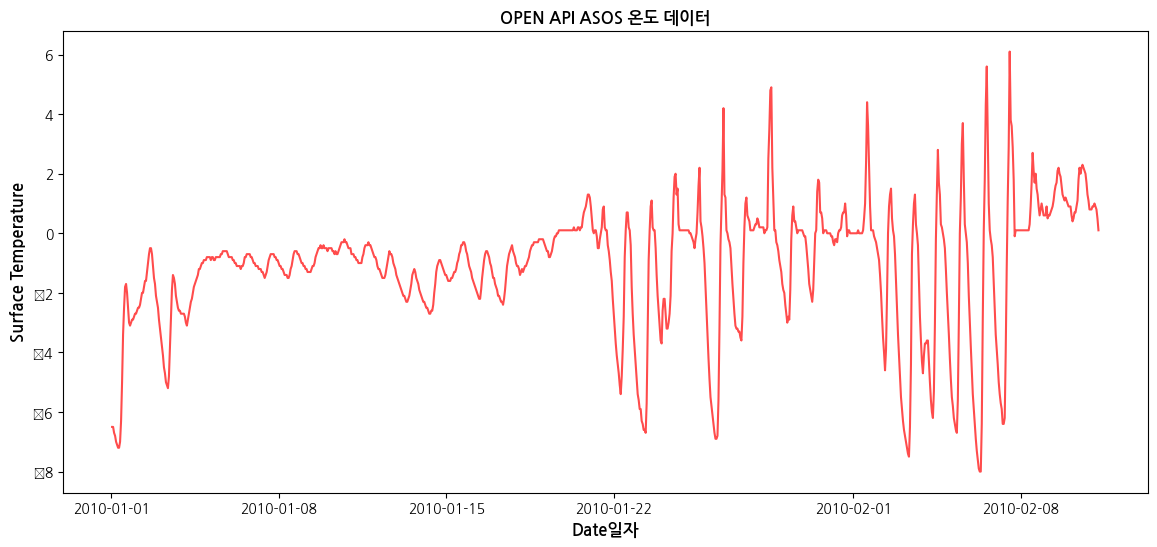

In [6]:
#한글 2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #폰트 관련 용도

#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path ="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

df['tm'] = pd.to_datetime(df['tm'])
df['ts'] = pd.to_numeric(df['ts'], downcast='float')
fig = plt.figure(figsize=(14,6))

ax = plt.subplot(1,1,1)
ax.plot(df['tm'],df['ts'],color='r',lw=1.5, alpha=0.7)

ax.set_ylabel('Surface Temperature', fontweight='bold', fontsize=12)
ax.set_xlabel('Date일자',fontweight='bold', fontsize=12)
ax.set_title('OPEN API ASOS 온도 데이터',fontweight='bold',fontsize=12)

Text(0.5, 1.0, 'OPEN API SOS Air Temprature data')

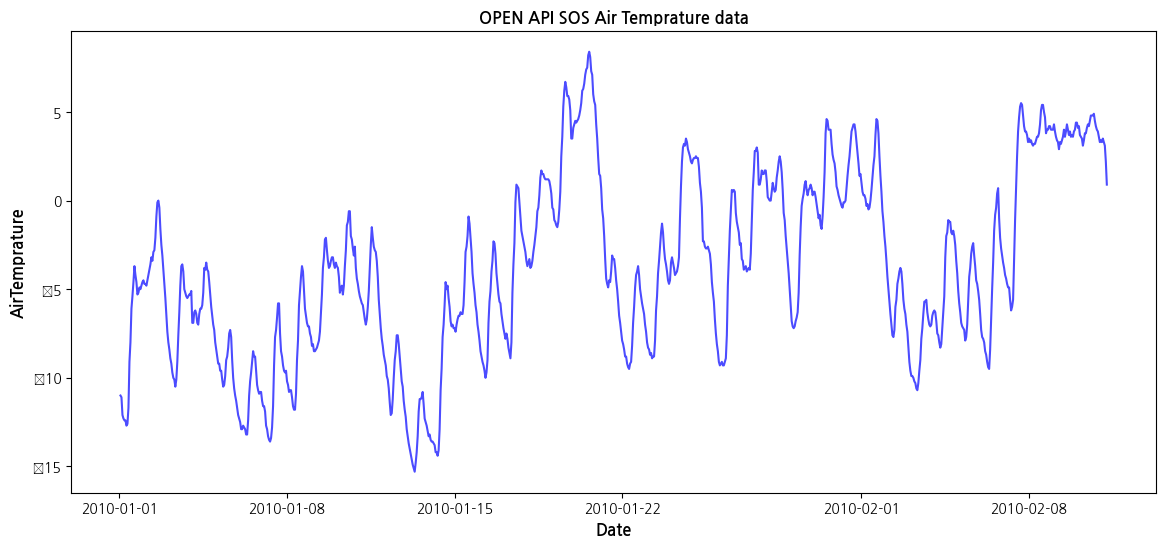

In [11]:
df['ta'] = pd.to_numeric(df['ta'], downcast='float')
fig = plt.figure(figsize=(14,6))

ax = plt.subplot(1,1,1)
ax.plot(df['tm'],df['ta'],color='b',lw=1.5, alpha=0.7)
ax.set_ylabel('AirTemprature', fontweight='bold', fontsize=12)
ax.set_xlabel('Date',fontweight='bold', fontsize=12)
ax.set_title('OPEN API SOS Air Temprature data',fontweight='bold',fontsize=12)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


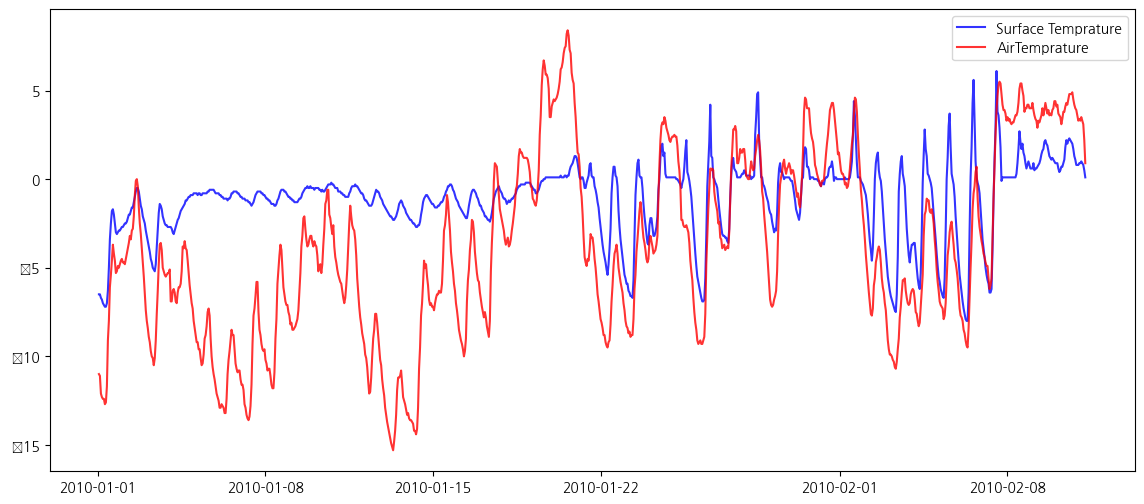

In [17]:
fig = plt.figure(figsize=(14,6))
ax = plt.subplot(1,1,1)
ax.plot(df['tm'],df['ts'],color='b',lw=1.5, alpha=0.8, label='Surface Temprature')
ax.plot(df['tm'],df['ta'],color='r',lw=1.5, alpha=0.8, label='AirTemprature')
ax.legend()
plt.show()

In [18]:
#파일로 저장
df.to_excel("output.xlsx")
df.to_csv('output.csv')